# NYC Taxi Trip Records Analysis Using Supervised Learning Algorithms

#### Author: Jingwen Gu

“Cities are not born smart. They become smart by understanding what is happening on their streets.” – New York City Taxi and Limousine Commission (TLC).

TLC is an agency of the New York City government that licenses and regulates the medallion taxis and for-hire vehicle industries, including app-based companies. Therefore, major trends in the taxi and for-hire vehicle industry are highlighted in TLC records and they are public available.

* What transportation data does TLC collect?

* Why collects data?

To understand traffic patterns, working conditions, vehicle efficiency, service availability, distinguish new business opportunities… 


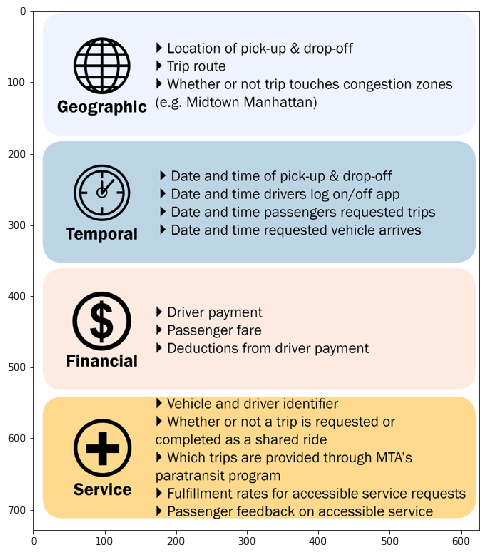

In [2]:
# importing matplotlib modules 
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 
import numpy

# Read Images 
img = mpimg.imread('data_include.png') 
  
plt.figure(figsize = (8,15))
plt.imshow(img)


# Part 1: INTRODUCTION

## 1) About the data

* This is TLC record in Jun 2016 for green taxi.
* Green cabs (or Street-hail Liveries), are For-Hire Vehicles that are permitted to accept street-hails. In exchange, Street-Hail Liveries may not operate in the Hail Exclusionary Zone, south of West 110th St and East 96th St.

* Source: publically available for free on NYC.gov
* I was living in NYC for some time during my internship and visited for a few times, and took taxi for sure. However, I never think about Taxi in terms of Trip Records. The research is interesting to me and I would like to introduce the result to my NYC friends next time.
* Dimension:
    - It has 1404726 rows and 21 columns, including all of the information about Taxi

## 2) Link to the data set
* NYC Taxi Limousine trip record data URL: https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page
* To download the data set: https://s3.amazonaws.com/nyc-tlc/trip+data/green_tripdata_2016-06.csv

In [3]:
# Enter link here.
nyc_gov_link = "https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page"
green_tripdata_download = "https://s3.amazonaws.com/nyc-tlc/trip+data/green_tripdata_2016-06.csv"

## 3) Import the data
List the total rows and columns

In [4]:
import numpy as np
import pandas as pd
import datetime as dt
import os
from scipy import stats
import matplotlib.pyplot as plt

# The dateset is 59MB, I downloaded to my local laptop to speed up.
#url = "/Users/Jingwen/Desktop/bioinfo-ML/green_tripdata_2016-06.csv"
url = "green_tripdata_2016-06.csv"

data = pd.read_csv(url)

# Report how many rows and columns of data you have loaded.
print("There are",data.shape[0],"rows and",data.shape[1],"columns.")

There are 1404726 rows and 21 columns.


## 4) Show the head of the data set

In [5]:
data.head()

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
0,2,2016-06-01 02:46:38,2016-06-01 03:06:40,N,1,-73.930580,40.695179,-74.000053,40.729046,1,...,19.5,0.5,0.5,6.24,0.0,NaN,0.3,27.04,1,1.0
1,2,2016-06-01 02:55:26,2016-06-01 03:06:52,N,1,-73.946930,40.792553,-73.951569,40.825161,1,...,11.5,0.5,0.5,2.56,0.0,NaN,0.3,15.36,1,1.0
2,2,2016-06-01 02:50:36,2016-06-01 03:08:39,N,1,-73.944534,40.823956,-73.994659,40.750423,1,...,23.5,0.5,0.5,2.00,0.0,NaN,0.3,26.80,1,1.0
3,2,2016-06-01 02:57:04,2016-06-01 03:07:52,N,1,-73.952209,40.823872,-73.914360,40.814697,1,...,10.5,0.5,0.5,0.00,0.0,NaN,0.3,11.80,2,1.0
4,2,2016-06-01 02:52:03,2016-06-01 03:08:12,N,1,-73.957977,40.717827,-73.954018,40.655121,3,...,16.5,0.5,0.5,0.00,0.0,NaN,0.3,17.80,1,1.0


## 5) Show me the shape of your data
* Size of the Data Set
* Shape of the Data Set
* Data Types of the Data Set

In [6]:
# data.size 
size = data.size 
  
# data.shape 
shape = data.shape 
  
# printing size and shape 
print("Size = {}\nShape ={}\nShape[0] x Shape[1] = {}\n". 
      format(size, shape, shape[0]*shape[1])) 

# data.dtypes
dtypes = data.dtypes
print("data types\n{}\n". 
      format(dtypes))

Size = 29499246
Shape =(1404726, 21)
Shape[0] x Shape[1] = 29499246

data types
VendorID                   int64
lpep_pickup_datetime      object
Lpep_dropoff_datetime     object
Store_and_fwd_flag        object
RateCodeID                 int64
Pickup_longitude         float64
Pickup_latitude          float64
Dropoff_longitude        float64
Dropoff_latitude         float64
Passenger_count            int64
Trip_distance            float64
Fare_amount              float64
Extra                    float64
MTA_tax                  float64
Tip_amount               float64
Tolls_amount             float64
Ehail_fee                float64
improvement_surcharge    float64
Total_amount             float64
Payment_type               int64
Trip_type                float64
dtype: object



## 6) Show me the proportion of missing observations for each column of your data

In [7]:
#see missing proportion 
data.isna().mean().round(4) * 100

VendorID                   0.0
lpep_pickup_datetime       0.0
Lpep_dropoff_datetime      0.0
Store_and_fwd_flag         0.0
RateCodeID                 0.0
Pickup_longitude           0.0
Pickup_latitude            0.0
Dropoff_longitude          0.0
Dropoff_latitude           0.0
Passenger_count            0.0
Trip_distance              0.0
Fare_amount                0.0
Extra                      0.0
MTA_tax                    0.0
Tip_amount                 0.0
Tolls_amount               0.0
Ehail_fee                100.0
improvement_surcharge      0.0
Total_amount               0.0
Payment_type               0.0
Trip_type                  0.0
dtype: float64

All variables contain no missing value except Ehail_fee, which includes 100% missing value. Therefore, this variable will be removed in data cleaning section.

## 7) Give me a problem statement.
Below, write a problem statement. Keep in mind that your task is to tease out relationships in your data and eventually build a predictive model. Your problem statement can be vague, but you should have a goal in mind. Your problem statement should be between one sentence and one paragraph.

#### Project goal: Predict tips amount using other features of the trips.

#### Project outline:
* Summarize the characteristics of the trips; explore traffic patterns
   - Distance by pickup/drop-off time: any difference in morning/evening peak?
   - Traffic flow by county
* Develop supervised model to predict the tips amount using other features of the trip.	
   - Data Cleaning
   - Feature engineering
   - Exploratory analysis
   - Modeling
   - Evaluation
* Visualize the results of finding
   - by map


## 8) What is your _y_-variable?

The independent variable will be tip amount. Histogram below shows the distribution of the tip amount variable.


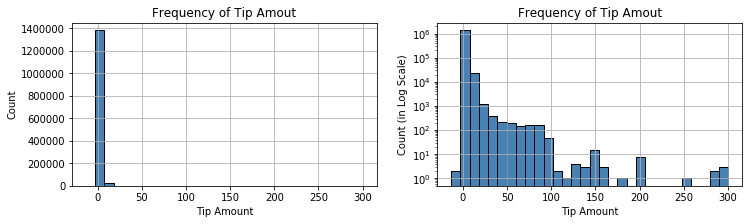

In [8]:
plt.figure(1, figsize=(12, 3))

def plotHistogram(data):
    plt.subplot(121)
    plt.hist(data.Tip_amount,
             bins=30,
             log=False,
             color='steelblue',
             edgecolor='k',)
    plt.xlabel('Tip Amount')
    plt.ylabel('Count')
    plt.grid(True)
    plt.title('Frequency of Tip Amout')

plotHistogram(data)


def plotHistogram_log(data):
    plt.subplot(122)
    plt.hist(data.Tip_amount,
             bins=30,
             log=True,
             color='steelblue',
             edgecolor='k',)
    plt.xlabel('Tip Amount')
    plt.ylabel('Count (in Log Scale)')
    plt.grid(True)
    plt.title('Frequency of Tip Amout')

plotHistogram_log(data)

plt.show() 

In [9]:
data.head()

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
0,2,2016-06-01 02:46:38,2016-06-01 03:06:40,N,1,-73.930580,40.695179,-74.000053,40.729046,1,...,19.5,0.5,0.5,6.24,0.0,NaN,0.3,27.04,1,1.0
1,2,2016-06-01 02:55:26,2016-06-01 03:06:52,N,1,-73.946930,40.792553,-73.951569,40.825161,1,...,11.5,0.5,0.5,2.56,0.0,NaN,0.3,15.36,1,1.0
2,2,2016-06-01 02:50:36,2016-06-01 03:08:39,N,1,-73.944534,40.823956,-73.994659,40.750423,1,...,23.5,0.5,0.5,2.00,0.0,NaN,0.3,26.80,1,1.0
3,2,2016-06-01 02:57:04,2016-06-01 03:07:52,N,1,-73.952209,40.823872,-73.914360,40.814697,1,...,10.5,0.5,0.5,0.00,0.0,NaN,0.3,11.80,2,1.0
4,2,2016-06-01 02:52:03,2016-06-01 03:08:12,N,1,-73.957977,40.717827,-73.954018,40.655121,3,...,16.5,0.5,0.5,0.00,0.0,NaN,0.3,17.80,1,1.0


# Part 2: Exploratory Analysis

In the following section, exploratory analysis is perform to the key variables in this data set, to help us understand the variables.

## 1) Passenger Count 

### i) Frequency table 

In [10]:
data_pie_percentage = data.groupby('Passenger_count').count()['VendorID']
print(data_pie_percentage)

Passenger_count
0        348
1    1186862
2     106347
3      29766
4       9861
5      49212
6      22234
7         57
8         35
9          4
Name: VendorID, dtype: int64


There are 348 records with no passenger. This is weird to the trip record and should be excluded.
In addition, there are there are very few records with 7-9 passengers. We will further look into this.

### ii) Passenger count by Pie chart

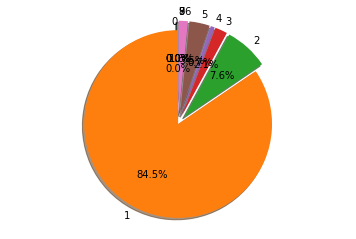

In [11]:
labels = [0,1,2,3,4,5,6,7,8,9]
sizes = data_pie_percentage
explode = (0, 0, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

84% of the passengers are taken taxi by themselves, 7.7% of the trips have two people and 2.3% have three people. Other categories of passenage count occupies subtle proportion from the pie chart.

### iii) Total fare by Passenger count in Pie chart

In [ ]:
data_pie_total_amount = data.groupby('Passenger_count').mean()['Fare_amount']

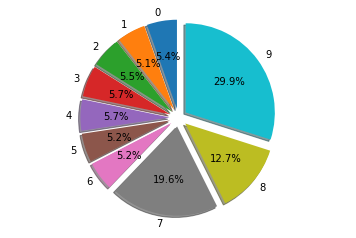

In [13]:
labels = [0,1,2,3,4,5,6,7,8,9]
sizes = data_pie_total_amount
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

The pie chart is again almost equally splitted, except for the category with 7, 8 and 9 passenger count.

Although in the section of introduction, we look into the proportion of missing in the data and conclude that there are zero percentage of missing in all variables except Ehail_fee. 

We can see from the pie chart that the total taxi fare are about the same for 0-6 passenger count category. It shows that the total taxi fare won't change by the number of people who were in the trip, which makes sense since this is the pool of taxi trip record. 

In addition, the fare increases in double for 7-9 passengers. However, there is less than 100 records in total with 7-9 passengers (0.007%) of the total record. It brings the problem of imbalance. But I won't consider to exclude them at this point.

### iv) Trip distance by Passenger count in Pie chart

In [14]:
data_pie_trip_distance = data.groupby('Passenger_count').mean()['Trip_distance']

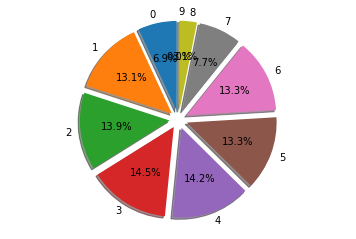

In [15]:
labels = [0,1,2,3,4,5,6,7,8,9]
sizes = data_pie_trip_distance
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

The pie chart is almost equally splited except 8 and 9. It shows the trip distance does not inflence by how many people in the taxi.


## 2) Pickup hour

Since the pickup-time and drop-off time are detailed in the trip record, I created two variables by hours (range 0-23) for these two variables.

In [16]:
def getStatistics(data):
    #list(data)
    data['Pickup_time'] = data.lpep_pickup_datetime.apply(lambda x:dt.datetime.strptime(x,"%Y-%m-%d %H:%M:%S"))
    data['Dropoff_time'] = data.Lpep_dropoff_datetime.apply(lambda x:dt.datetime.strptime(x,"%Y-%m-%d %H:%M:%S"))
    data['Pickup_hour'] = data.Pickup_time.apply(lambda x:x.hour)
    data['Dropoff_hour'] = data.Dropoff_time.apply(lambda x:x.hour)
    
getStatistics(data)

total_count=data.Pickup_hour.count()
data_pie_volume_by_hour = data.groupby('Pickup_hour').count()['VendorID']/total_count *100

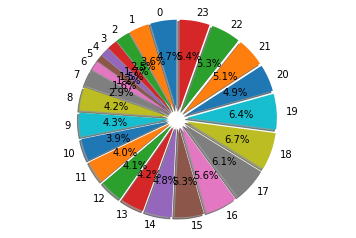

In [17]:
labels = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]

sizes = data_pie_volume_by_hour
explode = np.repeat(0.1,24)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

From the pie chart in a hourly cutting, we know that 1-6 am are the time with less people taking the cab, which makes sense.

## Part 3: Feature Engineering

### 1) Location information  

The pickup and dropoff location are good to have since it has limited usefulness for people to view pickup and dropoff ID information. The file could be downloaded from: https://github.com/rstudio/shiny-examples/tree/master/063-superzip-example/data



In [19]:
# import a map of location according to longitude and latitude

city = pd.read_csv("zip_codes_states.csv")
city.city.value_counts()

city_ = city[['latitude','longitude','county','city','state']]
nyc_state = ['NY']

city_ = city_[city_.state.isin(nyc_state)]

nyc_county=['Bronx','Kings','New York','Richmond','Queens']
# select only nyc county
city_ = city_[city_.county.isin(nyc_county)] 
city_list = city_.city.unique()

# create a summary table about county location
city_.groupby(['county']).agg([np.max, np.min]) 

latitude             longitude                      city  \
               amax       amin       amax       amin           amax   
county                                                                
Bronx     40.899178  40.807129 -73.799802 -73.921605          Bronx   
Kings     40.728388  40.584455 -73.876754 -74.028749       Brooklyn   
New York  40.863194  40.696355 -73.926959 -74.025276       New York   
Queens    40.792780  40.559365 -73.711159 -73.934502       Woodside   
Richmond  40.632943  40.510723 -74.077837 -74.241940  Staten Island   

                        state       
                   amin  amax amin  
county                              
Bronx             Bronx    NY   NY  
Kings          Brooklyn    NY   NY  
New York       New York    NY   NY  
Queens          Arverne    NY   NY  
Richmond  Staten Island    NY   NY


### 2) Create other features  

The features function is for creating new features in the data.
- pickup time and dropoff time
- trip time
- pickup day
- average speed

At the end, variable like trip type, borough, and zone are added transformed into factor.



In [20]:
# Feature engineering
from datetime import timedelta

def features(data):
    
    # create a variable describe Trip time
    data['pickup_time'] = data.lpep_pickup_datetime.apply(lambda x:dt.datetime.strptime(x,"%Y-%m-%d %H:%M:%S"))
    data['dropoff_time'] = data.Lpep_dropoff_datetime.apply(lambda x:dt.datetime.strptime(x,"%Y-%m-%d %H:%M:%S"))

    data['trip_time'] = (data['dropoff_time'] - data['pickup_time']) / timedelta(minutes=1)
    
    # week day
    data['pickup_day'] = data.lpep_pickup_datetime.apply(lambda x:dt.datetime.strptime(x,"%Y-%m-%d %H:%M:%S").strftime('%w'))
    
    # create a variable represent average speed
    data['avg_speed'] = round(data.Trip_distance/data.trip_time,2)
    data['avg_speed'] = data['avg_speed'].replace([np.inf, -np.inf], np.nan)
    data['avg_speed'].fillna((data['avg_speed'].mean()), inplace=True)

    # replace trip type with the most common category 1
    data['Trip_type '] = data['Trip_type '].replace(np.NaN,1)

    # generate county variable of pick up and drop off location 
    data['Pickup_city']='Others'
    data['Dropoff_city']='Others'
    
    for i in range(len(city_list)):   
        temp=city_[city_.city == city_list[i]]
        lat_max = temp.latitude.max()
        lat_min = temp.latitude.min()
        lon_max = temp.longitude.max()
        lon_min = temp.longitude.min()
        
        data['Pickup_city'] = np.where((data.Pickup_latitude >= lat_min) & 
                                       (data.Pickup_latitude <= lat_max) & 
                                       (data.Pickup_longitude >= lon_min) & 
                                       (data.Pickup_longitude <= lon_max), 
                                       city_list[i], data.Pickup_city)
        data['Dropoff_city'] = np.where((data.Dropoff_latitude >= lat_min) & 
                                        (data.Dropoff_latitude <= lat_max) & 
                                        (data.Dropoff_longitude >= lon_min) & 
                                        (data.Dropoff_longitude <= lon_max), 
                                        city_list[i], data.Dropoff_city)
    
    # generate city variable of pick up and drop off location 
    data['Pickup_county']='Others'
    data['Dropoff_county']='Others'
    
    for i in range(len(nyc_county)):   
        temp = city_[city_.county == nyc_county[i]]
        lat_max = temp.latitude.max()
        lat_min = temp.latitude.min()
        lon_max = temp.longitude.max()
        lon_min = temp.longitude.min()
        
        data['Pickup_county'] = np.where((data.Pickup_latitude >= lat_min) & 
                                         (data.Pickup_latitude <= lat_max) & 
                                         (data.Pickup_longitude >= lon_min) & 
                                         (data.Pickup_longitude <= lon_max), 
                                         nyc_county[i], data.Pickup_county)
        data['Dropoff_county'] = np.where((data.Dropoff_latitude >= lat_min) & 
                                          (data.Dropoff_latitude <= lat_max) & 
                                          (data.Dropoff_longitude >= lon_min) & 
                                          (data.Dropoff_longitude <= lon_max), 
                                          nyc_county[i], data.Dropoff_county)
    
    data.groupby(['Pickup_county']).size()  
    data.groupby(['Dropoff_county']).size()
    
    #transfer it into factor 
    data['Pickup_county_factor'] = data['Pickup_county'].astype('category').cat.codes
    data['Dropoff_county_factor'] = data['Dropoff_county'].astype('category').cat.codes
    data['Pickup_city_factor'] = data['Pickup_city'].astype('category').cat.codes
    data['Dropoff_city_factor'] = data['Dropoff_city'].astype('category').cat.codes
    
       
    return(data)    
    
f_data = features(data)

In [21]:
f_data.groupby(['Pickup_city']).size()

Pickup_city
Astoria              62182
Bayside                116
Bronx                56411
Brooklyn            531785
East Elmhurst          337
Elmhurst              7992
Far Rockaway           205
Flushing             53444
Jamaica              58176
Little Neck              6
Long Island City     26533
New York            447627
Others              158283
Ozone Park              56
Queens Village          47
Ridgewood             1356
Staten Island          170
dtype: int64

## Part 4: Data Cleaning

In the data cleaning section, cleaned data reflect following criteria based on the guideline https://www1.nyc.gov/site/tlc/passengers/taxi-fare.page:
   * Total fare amount not less than 2.5 (According to the guideline:  inital fare would be 2.5)
   * Positive passenger count 
   * Non-negative tip amount, fare amount, improvement surcharge, toll amount, extra, MTA tax
   * Remove the row with average speed does not make sense (>200)

In [22]:
# data cleaning

import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

def clean(data):   
    # remove obs with negative tip amount and total fare amount less than 2.5
    data = data[(data.Total_amount>=2.5)]
    
    # remove value with negative value 
    data =  data[(data.Passenger_count>0)&
                 (data.Tip_amount>=0) & 
                 (data.Fare_amount>=0) & 
                 (data.improvement_surcharge>=0) &
                 (data.Tolls_amount>=0) & 
                 (data.Extra>=0) & 
                 (data.MTA_tax>=0) &
                 (data.avg_speed<=200)]
    
    # encoding
    print(data.select_dtypes(include=['O']).columns)
    data['Store_and_fwd_flag'] = np.where((data.Store_and_fwd_flag=='Y'),1,0)
    
    # missing detect
    #print(data.isnull().sum())
    
    # drop column of NAs
    data = data.drop(columns=['Ehail_fee'],axis=1)
    
    return(data)


data_clean = clean(f_data)
data_clean.head()

Index(['lpep_pickup_datetime', 'Lpep_dropoff_datetime', 'Store_and_fwd_flag',
       'pickup_day', 'Pickup_city', 'Dropoff_city', 'Pickup_county',
       'Dropoff_county'],
      dtype='object')


,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,pickup_day,avg_speed,Pickup_city,Dropoff_city,Pickup_county,Dropoff_county,Pickup_county_factor,Dropoff_county_factor,Pickup_city_factor,Dropoff_city_factor
0,2,2016-06-01 02:46:38,2016-06-01 03:06:40,0,1,-73.930580,40.695179,-74.000053,40.729046,1,...,3,0.26,Brooklyn,New York,Queens,New York,4,2,3,12
1,2,2016-06-01 02:55:26,2016-06-01 03:06:52,0,1,-73.946930,40.792553,-73.951569,40.825161,1,...,3,0.27,New York,New York,New York,New York,2,2,11,12
2,2,2016-06-01 02:50:36,2016-06-01 03:08:39,0,1,-73.944534,40.823956,-73.994659,40.750423,1,...,3,0.42,New York,New York,New York,New York,2,2,11,12
3,2,2016-06-01 02:57:04,2016-06-01 03:07:52,0,1,-73.952209,40.823872,-73.914360,40.814697,1,...,3,0.21,New York,Bronx,New York,Bronx,2,0,11,2
4,2,2016-06-01 02:52:03,2016-06-01 03:08:12,0,1,-73.957977,40.717827,-73.954018,40.655121,3,...,3,0.30,Brooklyn,Brooklyn,New York,Kings,2,1,3,3


In [23]:
data_vis = data_clean

## Part 5: Correlation Analysis

Heatmap and scatter plots between predictors are applied for association. Scatter plots of the key predictors to the response variable are created.

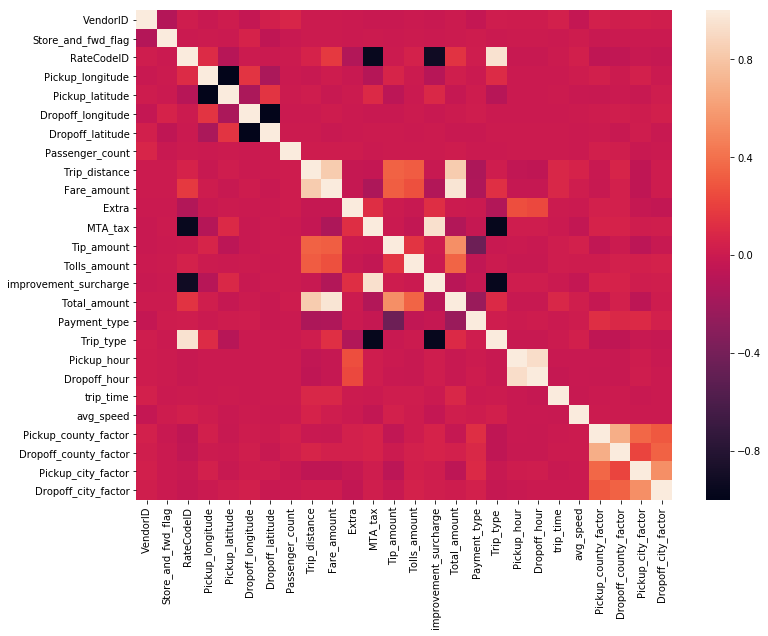

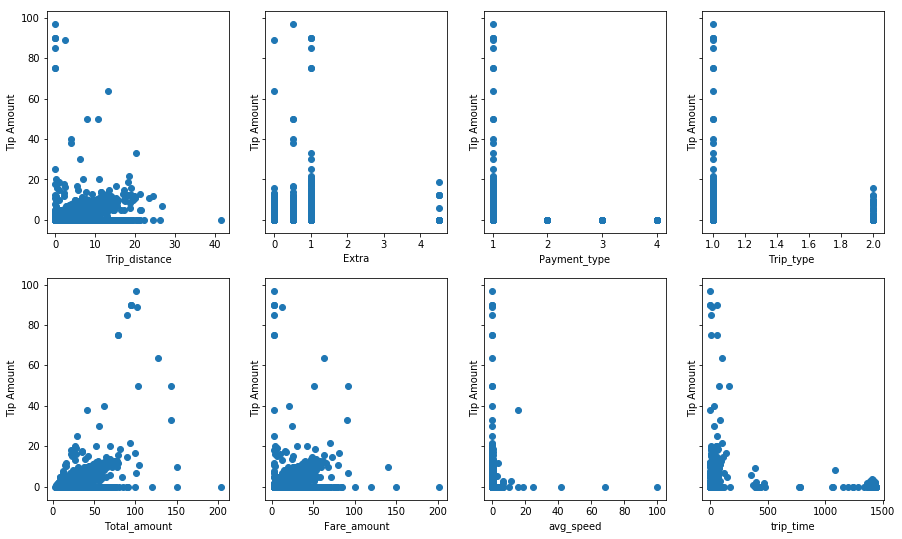

In [24]:
# Heat map
# Scatter plot
def exploratary(data):
    data_clean.corr()
    plt.figure(figsize = (12,9))
    ax=sns.heatmap(data.corr())

    var_list = [['Trip_distance','Extra','Payment_type','Trip_type '],
                ['Total_amount','Fare_amount', 'avg_speed','trip_time']]

    data_pattern = data_clean.head(10000)
    fig, ax = plt.subplots(len(var_list),len(var_list[0]),figsize=(15,9),sharey=True)
    for i in range(len(var_list)): 
        for j in range(len(var_list[i])):      
            ax[i,j].scatter(data_pattern[var_list[i][j]], data_pattern['Tip_amount'])
            ax[i,j].set_xlabel(var_list[i][j])
            ax[i,j].set_ylabel("Tip Amount")
                   
exploratary(data_clean)

From above scatter plot we could understand the meaning of the study topic. Tip amount is not always certain percentage range of the total amount. Instead, we could see when total_amount and trip_time are large, there are some trips with less tip amount. It might due to the negotiated price in adavance, which might related to payment type, trip type etc.

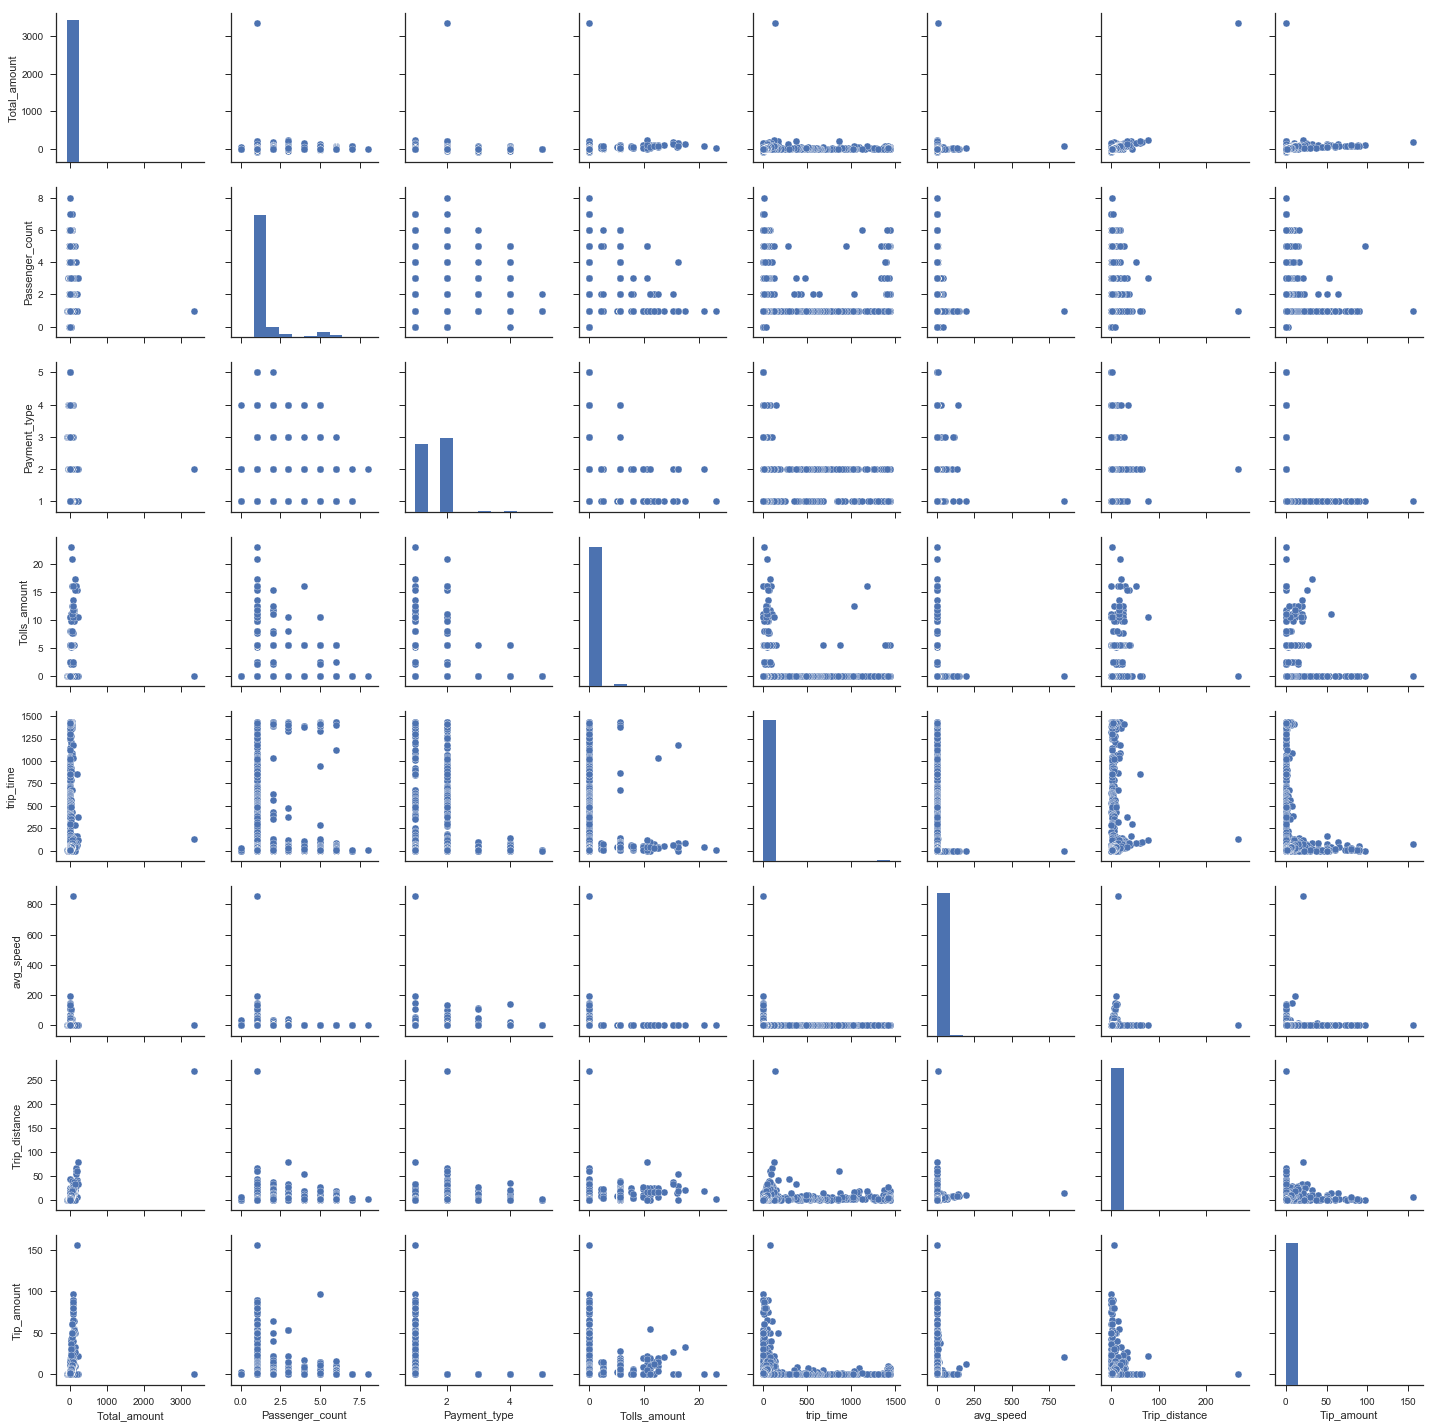

In [25]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)

data_model = f_data.head(50000)
X = data_model[['Total_amount','Passenger_count','Payment_type',
              'Tolls_amount','trip_time','avg_speed','Trip_distance','Tip_amount']]
g = sns.pairplot(X)

- VIF

To check which factors are causing multicollinearity, variance influence factors is computed for each predicting variable. It is the ratio of variance in a model with multiple terms, divided by the variance of a model with one term alone. Several sensitivity analysis has been performed to select the appropriate set of predictors set with no serious multicolinearity. The VIF of all below variables are less than 10, with means that there is no multicolinearity between variables and could be used in linear regression model. 

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

X = data_model[['Total_amount','Passenger_count','Payment_type',
                'Tolls_amount','trip_time','avg_speed','Trip_distance',
                'Extra','Pickup_city_factor','Dropoff_city_factor']]

for i in range(len(X.columns[:])):
    v = vif(np.matrix(X[:]),i)
    print("Variance inflation factor for {}: {}".format(X.columns[i],round(v,2)))

Variance inflation factor for Total_amount: 4.2
Variance inflation factor for Passenger_count: 2.52
Variance inflation factor for Payment_type: 4.79
Variance inflation factor for Tolls_amount: 1.12
Variance inflation factor for trip_time: 1.05
Variance inflation factor for avg_speed: 1.01
Variance inflation factor for Trip_distance: 4.69
Variance inflation factor for Extra: 1.76
Variance inflation factor for Pickup_city_factor: 5.44
Variance inflation factor for Dropoff_city_factor: 5.46


From multicolinearity test, 'Total_amount' and 'Fare_amount' has serious multicolinearity, therefore, 'Fare_amount' and will be excluded from modeling. 'Trip_type' removed due to high multicolinearity as well. The remaining variables are with VIF<10.

# Part 6: Modeling by Supervised Learning Algorithm

* After modeling with different algorithm, the learning curve of training and cross validation score along by sample size would be plotted to help determine whether more training samples are required in the modeling process.

* For the optimal model based on R-squared, grid search CV would be performed for selection of hyperparameters.

### 0) Learning Curve

Learning curve is a valuable diagnostic which tells us if we need to increase training data. If the learning curve has already converged (i.e., when the training and validation curves are already close to each other) adding more training data will not significantly improve the fit! 

Source: Python Data Science handbook https://github.com/ShanEllis/PythonDataScienceHandbook/blob/master/notebooks/05.03-Hyperparameters-and-Model-Validation.ipynb

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.3, 1.0, 10)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring="neg_mean_squared_error")
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

### 1) Linear regression

Multicolinearity has been checked before doing a linear regression model. 

The strategy is that to use all the most complex non-colinear variable combination are used as predictor. If the performance is not good, maybe other modeling method are preferred. If the performance is good, we will use 'anova' to remove the rebundant predictors and select the simple one with good prediction on the response variable 'tip_amount'.  

For linear regresion model, the residuals need to be normalily distributed. Shapio test is used for testing the normality of the residuals. If p-value<0.05, reject the null hypothesis of the residuals are normalily distributed.



In [31]:
from sklearn.linear_model import LinearRegression
from scipy.spatial.distance import euclidean
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
import pandas as pd
import seaborn as sb
from scipy.stats import shapiro
from statsmodels.graphics.gofplots import qqplot
import warnings
warnings.filterwarnings('ignore')
import random

random.seed(10)
data_model = data_clean.sample(50000)

X = data_model[['Total_amount','Passenger_count','Payment_type',
              'Tolls_amount','trip_time','avg_speed','Trip_distance',
               'Store_and_fwd_flag','Extra','Pickup_city_factor',
               'Dropoff_city_factor']]
    
y = data_model[['Tip_amount']]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=50)


lr = LinearRegression(fit_intercept=False)
lr.fit(X_train, y_train.values.ravel())
    
predicted_train = lr.predict(X_train)
predicted_test = lr.predict(X_test)

test_score = r2_score(y_test, predicted_test)
rmse = mean_squared_error(y_test, predicted_test)


print(f'Test data R2_score: {test_score:>5.3}')
print(f'Test data mean square error: {rmse:>5.3}')

residual = y_test.values - predicted_test
stat, p = shapiro(residual)
print('Statistics=%.3f, p=%.3f' % (stat, p))


Test data R2_score: 0.483
Test data mean square error:  3.26
Statistics=0.729, p=0.000


R-squared is 0.483. It means that the model explains 48.3% of the variability of the response data around its mean. Mean square error is 3.26. The residuals did not pass the normality test, which means that the residuals does not follow normal distribution. Simple linear regression is not appropriate.

### 2) Lasso regression 
Lasso regression are some of the simple techniques to reduce model complexity and prevent over-fitting which may result from simple linear regression. Residuals are not required to be normalily distributed.  

K-fold cross validation is used at here. The average mean square error are the average of each folds.

R2_score: 0.886
Mean square error:   0.9


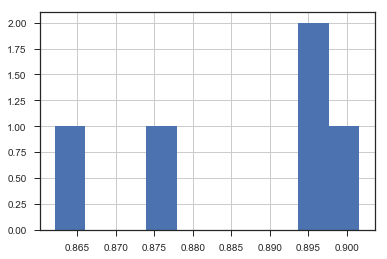

In [38]:
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import random

random.seed(1)
data_model = data_clean.sample(50000)

def lasso(data):

    X = data.drop(['Tip_amount', 'Pickup_time','Dropoff_time','lpep_pickup_datetime',
                   'Lpep_dropoff_datetime','pickup_time','dropoff_time','Pickup_city','Dropoff_city',
                  'Pickup_county','Dropoff_county'], axis=1)
    
    y = data[['Tip_amount']]

    llr = Lasso(alpha=0.5)
    llr.fit(X, y)
    preds = llr.predict(X)

    # Create the CV iterator
    cv_iterator = KFold(n_splits=5, shuffle=True, random_state=10)

    # Note: default in sklearn: higher return values are better than lower return values
    s = cross_val_score(llr, X, y, cv=cv_iterator)
    pd.Series(s).hist()
    r2 = s.mean() # R^2
    mse = abs(np.mean(cross_val_score(llr, X, y, cv=5, scoring="neg_mean_squared_error")))
    
    print(f'R2_score: {r2:>5.3}')
    print(f'Mean square error: {mse:>5.3}')

    return llr.predict(X)

y_pred_llr = lasso(data_model)

R-square for the lasso model is 0.886. Mean square error is 0.9. Both R-square and mean square error are better than the linear regression model.

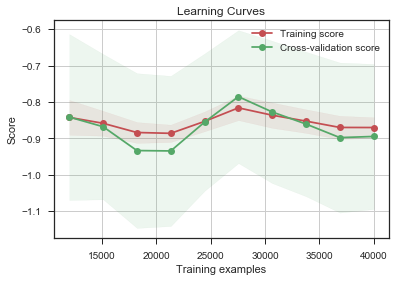

In [39]:
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

title = "Learning Curves"

# Create the CV iterator
X = data_model.drop(['Tip_amount', 'Pickup_time','Dropoff_time','lpep_pickup_datetime',
                   'Lpep_dropoff_datetime','pickup_time','dropoff_time','Pickup_city','Dropoff_city',
                  'Pickup_county','Dropoff_county'], axis=1)
y = data_model[['Tip_amount']]
    
cv_iterator = KFold(n_splits=5, shuffle=True, random_state=10)
llr = Lasso(alpha=0.5)

plot_learning_curve(llr, title, X, y, cv=cv_iterator, n_jobs=4)

plt.show()

The cross-validation score is changing with the training score. The highest score archieved when samples around 27,000. It means that increasing training samples might not improve the result.

### 3) Gradient Boost

Gradient boosting could be used in predicting regression and classification problems. Here we used the Gradient Boost regressor. As we could see from the lasso model, increasing the training sample size the result is not improving. Therefore, in the following two section, we will try gradient boost and random forest algorithm for prediction.

R2_score: 0.989
Mean square error:  2.23


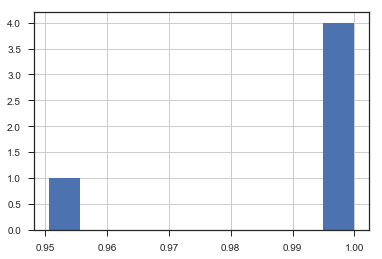

In [40]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

random.seed(1)
data_model = data_clean.sample(50000)

def gradientboost(data):
    
    X = data.drop(['Tip_amount', 'Pickup_time','Dropoff_time','lpep_pickup_datetime',
                   'Lpep_dropoff_datetime','pickup_time','dropoff_time','Pickup_city','Dropoff_city',
                  'Pickup_county','Dropoff_county'], axis=1)

    y = data[['Total_amount']]

    gbr = GradientBoostingRegressor()
    gbr.fit(X, y)
    preds = gbr.predict(X)
    
    # Create the CV iterator
    cv_iterator = KFold(n_splits=5, shuffle=True, random_state=10)

    # Note: default in sklearn: higher return values are better than lower return values
    s = cross_val_score(gbr, X, y, cv=cv_iterator)
    pd.Series(s).hist()
    r2=s.mean() # R^2
    mse=abs(np.mean(cross_val_score(gbr, X, y, cv=5, scoring="neg_mean_squared_error")))
    
    print(f'R2_score: {r2:>5.3}')
    print(f'Mean square error: {mse:>5.3}')
    
    #print("Processing time", dt.datetime.now()-tic)
    return gbr.predict(X)
    
y_pred_gbr = gradientboost(data_model)

The R-square of gradient boost model is 0.989. However, the average means square error of all folds is 2.23. R-square is much more larger compared with Lasso. However, the mean square error also larger, might implies that the prediction is not stable as the previous one.

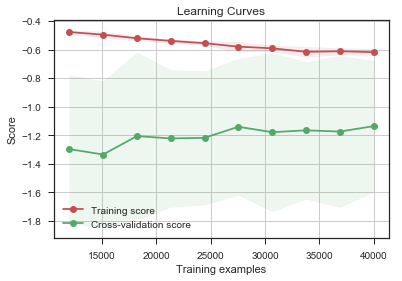

In [41]:
from sklearn.ensemble import GradientBoostingRegressor

title = "Learning Curves"

X = data_model.drop(['Tip_amount', 'Pickup_time','Dropoff_time','lpep_pickup_datetime',
                   'Lpep_dropoff_datetime','pickup_time','dropoff_time','Pickup_city','Dropoff_city',
                  'Pickup_county','Dropoff_county'], axis=1)
y = data_model[['Tip_amount']]

# Create the CV iterator
cv_iterator = KFold(n_splits=5, shuffle=True, random_state=10)
gbr = GradientBoostingRegressor()

plot_learning_curve(gbr, title, X, y, cv=cv_iterator, n_jobs=4)

plt.show()

The learning learn shows that, the cross validation score and the training score is approaching to each other. The cross validation score was increasing to the last training sample size. It verifies our thoughts that gradient boost prediction may be keep improving with larger training sample size.

### 3) Random forest

Random forest could be used in predicting regression and classification problems as well. 

R2_score:  0.92
Mean square error:  0.72


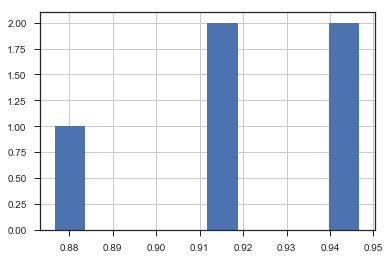

In [42]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from scipy.stats import spearmanr, pearsonr
from sklearn import metrics 

import warnings
warnings.filterwarnings('ignore')

random.seed(1)
data_model = data_clean.sample(50000)

def randomforest(data):
    
    X = data.drop(['Tip_amount', 'Pickup_time','Dropoff_time','lpep_pickup_datetime',
                   'Lpep_dropoff_datetime','pickup_time','dropoff_time','Pickup_city','Dropoff_city',
                  'Pickup_county','Dropoff_county'], axis=1)

    y = data[['Tip_amount']]

    rf = RandomForestRegressor(n_estimators=100,oob_score=True, random_state=10,
    min_samples_split=5,
    min_samples_leaf=3,
    max_depth=9)
    
    model = rf.fit(X, y)
    preds = rf.predict(X)
    
    # Create the CV iterator
    cv_iterator = KFold(n_splits=5, shuffle=True, random_state=10)

    # Note: default in sklearn: higher return values are better than lower return values
    s = cross_val_score(rf, X, y, cv=cv_iterator)
    pd.Series(s).hist()
    
    r2=s.mean() # R^2
    mse=abs(np.mean(cross_val_score(rf, X, y, cv=5, scoring="neg_mean_squared_error")))
    
    print(f'R2_score: {r2:>5.3}')
    print(f'Mean square error: {mse:>5.3}')
    
    return rf.predict(X)
    
y_pred_rf = randomforest(data_model)



The R square is 0.92, which is not so good compared with gradient boosting model. However, the mean square error is 0.72, much smaller compared with gradient boost model. 

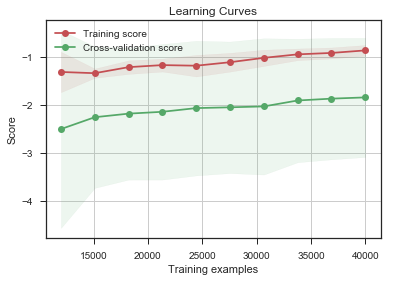

In [45]:
from sklearn.ensemble import RandomForestRegressor

title = "Learning Curves"

X = data_model.drop(['Tip_amount', 'Pickup_time','Dropoff_time','lpep_pickup_datetime',
                   'Lpep_dropoff_datetime','pickup_time','dropoff_time','Pickup_city','Dropoff_city',
                  'Pickup_county','Dropoff_county'], axis=1)
y = data_model[['Tip_amount']]

rf = RandomForestRegressor(n_estimators=100,oob_score=True, random_state=10,
    min_samples_split=5,
    min_samples_leaf=3,
    max_depth=9)
    
# Create the CV iterator
cv_iterator = KFold(n_splits=5, shuffle=True, random_state=10)

plot_learning_curve(rf, title, X, y, cv=cv_iterator, n_jobs=4)

plt.show()

Cross validation score and training score are in an uptrend parallel. Increase sample size might improve the prediction. Moving forward, we will try Gridsearch for hyperparameter selection for random forest model.

### What's next?

- Increase sample size on machine learning algorithm
- GridSearch for hyperparameter selection in Example
- Visulization the traffic pattern on the map

# Part 7: GridSearch for Hyperparameter Selection

In [ ]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import random
import warnings
warnings.filterwarnings('ignore')

random.seed(1)
data_model = data_clean.sample(10000)

X = data_model.drop(['Tip_amount', 'Pickup_time','Dropoff_time','lpep_pickup_datetime',
                   'Lpep_dropoff_datetime','pickup_time','dropoff_time','Pickup_city','Dropoff_city',
                  'Pickup_county','Dropoff_county'], axis=1)
y = data_model[['Tip_amount']]

# Create kf instance 
kf = KFold(n_splits=5, shuffle=True, random_state=42)
# Create dt instance 
rf = RandomForestRegressor()
# Create grid search instance 
gscv = GridSearchCV(
    rf, 
    {"max_depth": range(1, 20),
     "n_estimators": range(2, 20), 
     "min_samples_leaf": range(1, 6),
     "min_samples_split": range(2, 10)},
    cv=kf, 
    n_jobs=-1
)
gscv.fit(X, y)
# Get cross-validation data
cv_df = pd.DataFrame(gscv.cv_results_)
# Create a heatmap-style table

piv_df = cv_df.pivot_table(index=["param_max_depth", "param_min_samples_leaf"],
           columns=["param_n_estimators", "param_min_samples_split"],
           values="mean_test_score").round(3)
piv_df.style.background_gradient(cmap="nipy_spectral", axis=None)



# Part 8: Visualization

In [47]:
#!pip install folium
import folium
import os
from IPython.display import HTML, display
from folium.plugins import MarkerCluster

def drawGoogleMap(data):
    county_ = ['Bronx', 'Kings', 'New York', 'Others', 'Queens', 'Richmond']

    marker_cluster = folium.Map(location=[40.767937, -73.982155], zoom_start=10)

    county_pop = data.groupby(['Pickup_county']).count()['VendorID']

    county_lat = (data.groupby(['Pickup_county']).agg([np.max, np.min])['Pickup_latitude']['amax'] + 
    data.groupby(['Pickup_county']).agg([np.max, np.min])['Pickup_latitude']['amin'])/2

    county_lon = (data.groupby(['Pickup_county']).agg([np.max, np.min])['Pickup_longitude']['amax'] + 
    data.groupby(['Pickup_county']).agg([np.max, np.min])['Pickup_longitude']['amin'])/2

    for i in range(len(county_lat)):
        if county_[i] != 'Others':
            folium.Marker(
                location=[county_lat[i], county_lon[i]],
                popup=county_[i],
                icon=None,    
            ).add_to(marker_cluster)

            RADIUS = max(county_pop[i] / 10000, 10)

            folium.CircleMarker(
                location=[county_lat[i], county_lon[i]],
                radius=RADIUS,
                color='#FFEC8B',
                fill_color='#FFEC8B',             
                popup=county_[i],
            ).add_to(marker_cluster)

    display(marker_cluster)
    
drawGoogleMap(data_vis)

The map gives us an overview of the volume of green taxi in geography. The bullets represent for pick-up county and radius stands for the size of transaction happened in that county. From the map explicitly show that New York is the most frequent pick-up area, followed by Queens and Kings. Richmond and Bronx county have relatively much smaller population of taking green taxi. 

In [49]:
# Draw a HeatMap

#!pip install plotly
from sklearn.neighbors import KNeighborsClassifier
import plotly.offline as py
import plotly.graph_objs as go

def drawHeatMap(data):
    neighborhood = {
                -73.7854240738: 'JFK Queens',
                -73.9810421975: 'Midtown North West',
                -73.9862336241: 'East Village NY',
                -73.971273324:  'Midtown North East',
                -73.9866739677: 'Brooklyn Parkslope',
                -73.8690098118: 'LaGuardia Queens',
                -73.9890572967: 'Midtown NY',
                -74.0081765545: 'Downtown NY',
                -73.9213024854: 'Astoria Queens',
                -73.9470256923: 'Harlem NY',
                -73.9555565018: 'Upper East Side NY',
                -73.9453487097: 'Brooklyn Williamsburgt'}
    
    rides_df = pd.DataFrame(columns = neighborhood.values())
    rides_df['name'] = neighborhood.values()

    neigh = KNeighborsClassifier(n_neighbors=1)
    neigh.fit(np.array(list(neighborhood.keys())).reshape(-1, 1), list(neighborhood.values()))

    data['Pickup_neighborhood'] = neigh.predict(data.Pickup_longitude.values.reshape(-1,1))
    data['Dropoff_neighborhood'] = neigh.predict(data.Dropoff_longitude.values.reshape(-1,1))

    for col in rides_df.columns[:-1]:
        rides_df[col] = rides_df.name.apply(lambda x: len(data[(data.Pickup_neighborhood == x) & 
                                                               (data.Dropoff_neighborhood == col)]))
    py.init_notebook_mode(connected=True)

    trace = go.Heatmap(z= np.array(rides_df.values),
                      x = rides_df.columns[:-1],
                      y = rides_df.columns)
    layout = dict(
        title = ' <b>Neighborhoods Interaction</b>',
        titlefont = dict(
        size = 30,
        color = ('rgb(100,100,100)')),
        margin = dict(t=100,r=100,b=100,l=150),
            yaxis = dict(
                title = ' <b> From </b>'),
            xaxis = dict(
                title = '<b> To </b>'))
    data_HeatMap=[trace]
    fig = go.Figure(data=data_HeatMap, layout=layout)
    py.iplot(fig, filename='labelled-heatmap')
    
drawHeatMap(data_vis)

The heat map above shows the relationship between pick-up and drop-off location. In the red/orange/grey area, where demonstrates high volumn of transaction happened, has the same pick-up and drop-off location. It indicates that people in NYC take green taxi for short distance trip and mainly trips are in the are of Astoria Queens, Upper Manhattan and LaGuardia airport. 

This is consistent with principle that green taxi created to provide convenience for people in Brooklyn, Queens, the Bronx, and Upper Manhattan to have more access to metered taxis, and usually they are less expensive than livery cars. Most of the trip are short distance from the pickup location, very few to Manhattan area. Probably result from green taxi regulation that they are not allowed to pickup passengers in Mid/Downtown Manhattan on their way back. 